<a href="https://colab.research.google.com/github/nestormontano/PrDS_2023_01_IEEE_Deteccion_Fraude/blob/main/Scripts/IEEE_Deteccion_Fraude__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos - Proyecto IEEE-CIS Deteccion de fraude

Sitio del concurso: https://www.kaggle.com/competitions/ieee-fraud-detection/overview
  
Datos: https://drive.google.com/drive/folders/1lhKnZfq2jQKkivLTFbmWn6ZSvNm8cKIe?usp=share_link
  
Deben seguir las instrucciones dadas en el pdf, esto es 
- Ser invitados como colaboradores del repositorio en GitHub 
- Abrir la carpeta y hacer un acceso directo en su drive 
- Conectar el Colab con su drive 

Recuerden que deben cambiar la carpeta que será el workspace o las rutas para poder importar los datos.

Finalmente, seguir las instrucciones del pdf para escribir en GitHub los cambios para que se noten sus aportes.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Preliminares

In [2]:
import pandas as pd
import numpy as np
import os
import textwrap
import matplotlib.pyplot as pl

#Permite ver en los resultados todas las columnas y las filas, Grupo Marianita, Herdiz, Erick
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
! pip install skimpy

In [ ]:
!pip install -U dataprep

In [5]:
from skimpy import skim

In [6]:
from dataprep.eda import create_report

In [ ]:
## Esto debe ser modificado por uds, por favor creen otra linea y comenten esta 
##os.chdir('/content/drive/MyDrive/CURSOS_DICTADOS/TUTORIAS/PrDS_2023_01_IEEE_Deteccion_Fraude')
os.chdir('/content/drive/MyDrive/cc_fraude/dataset')


In [65]:
## HZ CONEXION
os.chdir('/content/drive/MyDrive/Python_Colab/Datos/')
dir_base_catego='/content/drive/MyDrive/Python_Colab/Datos/'

'/content/drive/MyDrive/Python_Colab/Datos/'

In [ ]:
# Carpeta base Drive - HL
dir_base = "/content/drive/MyDrive/ds_ieee_fraud_detection" 
# Cargar directamente el el DF de Entrenamiento Combinado / Unido
train = pd.read_csv(dir_base+'/train_combined.csv')
print(train.shape)

(590540, 434)


In [11]:
''' Esta funcion es una utilitaria para imprimir los nombres de columnas y 
que no toque hacer desplazamiento horizontal'''
wrapper = textwrap.TextWrapper(width=100)

## EDA

### Importar

#### Importar

In [12]:
train_identity= pd.read_csv('train_identity.csv')
train_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [13]:
# list( train_identity.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'floating') ) ) ) )

Columnas Object
['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34',
'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
Columnas Entero
['TransactionID']
Columnas Float
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11',
'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26',
'id_32']


In [14]:
train_transaction= pd.read_csv('train_transaction.csv')
train_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [15]:
# list( train_transaction.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'floating') ) ) ) )

Columnas Object
['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5',
'M6', 'M7', 'M8', 'M9']
Columnas Entero
['TransactionID', 'isFraud', 'TransactionDT', 'card1']
Columnas Float
['TransactionAmt', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3',
'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5',
'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34',
'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48',
'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62',
'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V

#### Cambiar el tipo de datos a las columnas

De acuerdo al sitio oficial, todos es numérico excepto:   

'TransactionID' que es ID, entero, 'isFraud' que es 0 o 1 y 'TransactionDT' que es timedelta (puede tomarse como entero)

**Categorical Features - Transaction**  
ProductCD, card1 - card6, addr1, addr2, P_emaildomain, R_emaildomain, M1 - M9

**Categorical Features - Identity**  
DeviceType, DeviceInfo, id_12 - id_38  

The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

##### Transacciones

In [16]:
# Columnas categoricas
cols_cat_trns= ['ProductCD', 
            'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
            'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 
            'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

In [17]:
# Columnas enteras
cols_int_trns= ['TransactionID', 'isFraud', 'TransactionDT']

In [18]:
for column in train_transaction.columns:      
    if column in cols_cat_trns:
        train_transaction[column] = train_transaction[column].astype(str)
    elif column in cols_int_trns:
        train_transaction[column] = pd.to_numeric(
                      train_transaction[column], errors='coerce', downcast= 'integer' )        
    else:
        train_transaction[column] = pd.to_numeric(
                      train_transaction[column], errors='coerce')

In [19]:
for c in train_transaction.columns:
  if c in cols_cat_trns:
    train_transaction[c] = train_transaction[c].astype('category')

In [20]:
# list( train_transaction.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( train_transaction.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
[]
Columnas Entero
['TransactionID', 'isFraud', 'TransactionDT']
Columnas Float
['TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39',
'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53',
'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67',
'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95',
'V96', 'V97', 'V98', 'V99'

---
##### Identidades

Para la de identidades, todo es categorico excepto:




In [21]:
# Columnas categoricas
cols_int_idnt= ['TransactionID']

In [22]:
# Columnas numericas
cols_num_idnt= ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11']

In [23]:
for column in train_identity.columns:      
    if column in cols_int_idnt:         
        train_identity[column] = pd.to_numeric(
                      train_identity[column], errors='coerce', downcast= 'integer' )
    elif column in cols_num_idnt:
        train_identity[column] = pd.to_numeric(
                      train_identity[column], errors='coerce', downcast= 'float')
    else:
        train_identity[column] = train_identity[column].astype(str)

In [24]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.00,70787.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,NotFound,nan,-480.0,New,NotFound,166.0,nan,542.0,144.0,nan,nan,nan,nan,nan,nan,nan,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.00,98945.00,NaN,NaN,0.00,-5.00,NaN,NaN,NaN,NaN,100.00,NotFound,49.0,-300.0,New,NotFound,166.0,nan,621.0,500.0,nan,nan,nan,nan,nan,nan,nan,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.00,191631.00,0.00,0.00,0.00,0.00,NaN,NaN,0.00,0.00,100.00,NotFound,52.0,nan,Found,Found,121.0,nan,410.0,142.0,nan,nan,nan,nan,nan,nan,nan,Found,Found,nan,chrome 62.0,nan,nan,nan,F,F,T,T,desktop,Windows
3,2987011,-5.00,221832.00,NaN,NaN,0.00,-6.00,NaN,NaN,NaN,NaN,100.00,NotFound,52.0,nan,New,NotFound,225.0,nan,176.0,507.0,nan,nan,nan,nan,nan,nan,nan,New,NotFound,nan,chrome 62.0,nan,nan,nan,F,F,T,T,desktop,nan
4,2987016,0.00,7460.00,0.00,0.00,1.00,0.00,NaN,NaN,0.00,0.00,100.00,NotFound,nan,-300.0,Found,Found,166.0,15.0,529.0,575.0,nan,nan,nan,nan,nan,nan,nan,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [25]:
# list( train_identity.select_dtypes( include= 'integer') )  # Comando base
print( 'Columnas Object' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'object') ) ) ) )
print( 'Columnas Entero' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'integer') ) ) ) )
print( 'Columnas Float' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'floating') ) ) ) )
print( 'Columnas Verdadero Falso' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'bool') ) ) ) )
print( 'Columnas Categoricas' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'category') ) ) ) )
print( 'Columnas Fecha' )
print( wrapper.fill( str( list( train_identity.select_dtypes( include= 'datetime') ) ) ) )

Columnas Object
['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
Columnas Entero
['TransactionID']
Columnas Float
['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']
Columnas Verdadero Falso
[]
Columnas Categoricas
[]
Columnas Fecha
[]


#### Unir los datos

In [26]:
train= pd.merge( train_transaction, train_identity, how= "left", on= 'TransactionID')

In [27]:
train.shape

(590540, 434)

In [28]:
## Para proteger la ram, eliminar 
del train_transaction
del train_identity

In [29]:
import gc
gc.collect()

0

### EDA univariado

Para encontrar qué variables deben ser excluidas del modelo, si se requiere alguna transformación, etc.

In [ ]:
skim(train[1:100])

Para encontrar qué variables deben ser excluidas del modelo, si se requiere alguna transformación, etc.
Registros entre 101 a 200

In [ ]:
skim(train[101:200])

In [ ]:
skim(train[590441:590540])

In [ ]:
 create_report(train[1:50]) # Este proceso es lento

Matriz de correlación: Para conocer qué variables están correlacionadas y son dependientes entre sí, y poder quitarlas del análisis.

In [ ]:
id_corr_mat = train.corr()   ## Grupo Marianita, Herdiz, Erick
id_corr_mat

,TransactionID,isFraud,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,...,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11
TransactionID,1.000000,0.014166,0.998280,0.012025,-0.027043,-0.026273,-0.053154,-0.055186,-0.008896,-0.057235,...,0.170335,-0.023269,-0.000268,-0.061198,-0.026956,-0.119807,0.036772,-0.032954,0.009245,0.031831
isFraud,0.014166,1.000000,0.013103,0.011320,0.021522,-0.019054,0.030570,0.037229,-0.006833,0.030382,...,0.049398,0.041457,-0.059701,-0.007978,-0.027139,-0.084768,-0.057489,0.029431,0.011043,0.007914
TransactionDT,0.998280,0.013103,1.000000,0.011920,-0.027295,-0.026860,-0.049318,-0.051126,-0.007546,-0.053104,...,0.165871,-0.021693,-0.000580,-0.060909,-0.026329,-0.123596,0.035117,-0.032267,0.008721,0.030883
TransactionAmt,0.012025,0.011320,0.011920,1.000000,0.026146,0.023143,-0.017722,-0.018468,-0.004798,-0.010148,...,-0.055584,-0.002813,0.002748,0.076302,0.025777,0.085212,-0.016246,0.008281,-0.004869,-0.040908
dist1,-0.027043,0.021522,-0.027295,0.026146,1.000000,NaN,-0.021364,-0.020114,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id_07,-0.119807,-0.084768,-0.123596,0.085212,NaN,-0.044094,-0.057076,-0.060867,0.018108,-0.059540,...,-0.000758,0.021234,0.043020,0.219281,-0.028910,1.000000,-0.094086,0.082746,0.071988,0.028578
id_08,0.036772,-0.057489,0.035117,-0.016246,NaN,0.034848,0.022218,0.024536,0.029334,0.015935,...,0.005047,0.056737,0.051455,0.008645,0.326691,-0.094086,1.000000,0.112471,0.086326,-0.011566
id_09,-0.032954,0.029431,-0.032267,0.008281,NaN,-0.018213,-0.025309,-0.026389,0.003245,-0.031135,...,-0.020656,0.710782,0.251470,0.085882,0.079989,0.082746,0.112471,1.000000,0.316010,-0.037671
id_10,0.009245,0.011043,0.008721,-0.004869,NaN,-0.046273,-0.036222,-0.034563,-0.006231,-0.048559,...,0.017490,0.112707,0.337323,-0.070985,0.222372,0.071988,0.086326,0.316010,1.000000,0.070048


In [ ]:
corr_var=train.iloc[:, 17:31]  ## Grupo Marianita, Herdiz, Erick
corr_var.corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396
C10,0.958202,0.970624,-0.001494,0.952466,-0.011846,0.914440,0.985062,0.996970,-0.014731,1.000000,0.956056,0.983817,0.653941,0.853009


In [ ]:
## Correlación de las variables D1 - D15 ## Grupo Marianita, Herdiz, Erick
corrD_var=train.iloc[:, 31:46]  
corrD_var.corr()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
D1,1.000000,0.981311,0.280423,0.585714,0.055236,0.525691,0.204924,0.050165,0.007667,0.562145,0.592629,0.521104,0.370195,0.154799,0.638957
D2,0.981311,1.000000,0.266112,0.570017,0.238365,0.601299,0.454152,0.275304,0.042867,0.525967,0.563220,0.668833,0.394203,0.196670,0.618243
D3,0.280423,0.266112,1.000000,0.149038,0.707425,0.304947,0.818080,0.194211,0.006983,0.092362,0.055433,0.349025,0.136444,0.029219,0.141511
D4,0.585714,0.570017,0.149038,1.000000,0.313650,0.956966,0.574098,0.162900,0.041768,0.636928,0.657797,0.999999,0.383803,0.135268,0.751546
D5,0.055236,0.238365,0.707425,0.313650,1.000000,0.551310,0.986496,0.249365,0.031991,0.116784,0.058496,0.565222,0.134026,0.064274,0.188533
D6,0.525691,0.601299,0.304947,0.956966,0.551310,1.000000,0.506527,0.185532,0.040119,0.463143,NaN,0.976834,0.419894,0.207166,0.700615
D7,0.204924,0.454152,0.818080,0.574098,0.986496,0.506527,1.000000,0.223624,0.025509,0.107557,NaN,0.553886,0.123023,0.035528,0.285026
D8,0.050165,0.275304,0.194211,0.162900,0.249365,0.185532,0.223624,1.000000,0.066085,0.168607,NaN,0.157520,0.521432,0.080991,0.226635
D9,0.007667,0.042867,0.006983,0.041768,0.031991,0.040119,0.025509,0.066085,1.000000,0.063333,NaN,0.026858,0.024555,0.042368,0.054647
D10,0.562145,0.525967,0.092362,0.636928,0.116784,0.463143,0.107557,0.168607,0.063333,1.000000,0.609652,0.018188,0.277137,0.336933,0.712252


In [ ]:
#Para seleccionar las variables V339
train.iloc[:, 55:155]  ## Grupo Marianita, Herdiz, Erick


Consideramos que no se debe sacar las correlaciones entre las variables V1... Nn puesto que la mayoría tienen valores de más de 70% perdidos NA.

#### ++ Variables con errores

Del eda univariado en lote, ¿existe alguna variable a la que le vean algo raro? Corregirlo (ojo, no digo que exista, deben analizar las tablas y gráficos a detalle)

**Observaciones de las variables**

"is_Fraud" el recuento de transacciones fraudulentas presentes en el conjunto es muy bajo en comparación con las transacciones no fraudulentas, lo que implica que el conjunto está desequilibrado.

"TransactionDT" es una variable que hace referencia a la fecha, como su valor mínimo es 86400=(24)(60)(60), se puede considerar que la variable está dada en segundos.

"TransactionAmt" el 75% del monto de las transacciones realizadas son menores a 125, mientras que el monto máximo es de 31937, es decir, los datos presentan un sesgo a la izquierda ya que los montos están concentrados en montos pequeños.

"dist1" y "dist2" son variables referentes a la distancia, por si solas no dan información; "dist1" tiene un 60% de datos faltantes y "dist2" un 94%, por lo que se puede optar por eliminar dichas variables.

**Grupo Marianita, Herdiz, Erick**
* VAriable Dist1 y Dist2 tienen cerca del 60% de valores perdidos.
* Variable Dist1 tiene Media: 190 y SD: 510 el VMin:0 y VMax:2400
* Variable Dis2 tiene Media:120 y SD: 120, el Vmin:6 y VMax: 740
Coclusión de las variables Dist1 y Dist2 eliminarlas, puesto que el 60% tiene NA.

"C1" a "C14" estas variables son alusivas a conteos de direcciones asociadas con la tarjeta; dichas variables tienen intervalos similares y la mayoría de sus valores están centrados en el valor cero, hay que analizar si las variables están correlacionadas. No presentan datos faltantes.

Grupo Marianita, Herdiz, Erick
Informe de Matriz de correlación con las Variables: C1- C14:   

* Variable C1 y C2 (conteo de direcciones) están perfectamente correlacionadas, dejar una de las dos.
* Variable  C4 Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C6 Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C7  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C8  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C10  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C11  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C12  Vs Variables C1 y C2 altamente correlacionadas.
* Variable  C13  Vs Variables tiene una correlación de C1: 0.77 y C2:0.75.
* Variable  C14 Vs Variables C1 y C2 altamente correlacionadas.
* Variable C3 no presenta ninguna correlación con las C1 a C14
* VArialble C5 tiene relación con la C13 y C9.
* Variable C10 no tiene correlación con la C3, C5 y C9.
* Variable C11 no tiene correlación con la C3, C5 y C9.
* Variable C12 no tiene correlación con la C3, C5 y C9.
* Variable C13 no tiene correlación con la C3.
* Variable C14 no tiene correlación con la C3, C5 y C9.

"D1" a "D15" son variables de tiempo, como los días entre transacciones anteriores; "D9" tiene un rango entre 0 y 1, los datos el resto de las variables presentan un gran sesgo hacia la izquierda ya que la mayoría de sus valores son pequeños. "D1", "D4", "D10" y "D15" presentan menos del 30% de datos faltantes, el resto de las variables presentan entre un 50% y 93%. Conviene analizar si las variables están correlacionadas y si es el caso solo quedarse con las variables con menores datos faltantes.

"D4", "D6", "D11", "D12", "D14" y "D15" contienen datos negativos.

Correlaciones entre Variables: D1 - D15  Grupo Marianita, Herdiz, Erick.

* Correlación D1 vs D2 0.98 
* Correlación D1 vs D4 0.59
* Correlación D1 vs D6 0.53
* Correlación D1 vs D10 0.56
* Correlación D1 vs D11 0.59
* Correlación D1 vs D12 0.52
* Correlación D1 vs D15 0.64 
* Correlación D2 vs D4 0.57
* Correlación D2 vs D6 0.60 
* Correlación D2 vs D10 0.52 
* Correlación D2 vs D11 0.56 
* Correlación D2 vs D12 0.67 
* Correlación D2 vs D15 0.62 
* Correlación D3 vs D5 0.71 
* Correlación D3 vs D7 0.82 
* Correlación D4 vs D6 0.95 
* Correlación D4 vs D7 0.57 
* Correlación D4 vs D10 0.64 
* Correlación D4 vs D11 0.66 
* Correlación D4 vs D12 0.99 
* Correlación D4 vs D15 0.75 
* Correlación D5 vs D6 0.55 
* Correlación D5 vs D7 0.98 
* Correlación D5 vs D12 0.56 
* Correlación D6 vs D7 0.51 
* Correlación D6 vs D12 0.98 
* Correlación D6 vs D15 0.70 
* Correlación D7 vs D12 0.55 
* Correlación D8 vs D13 0.52 
* Correlación D10 vs D11 0.61 *
* Correlación D10 vs D15 0.71 *


* La Variable D11 presenta correlación con todos las variables excepto con D3, y también prsesenta correlaciones NA, tiene más del 50% de valores NA, sugerimos eliminarla.
* La Variable D12, D13, D14 presenta más del 50% de datos NA.





"id_01" a "id_11" todas las variables tienen más del 75% de datos faltantes. La mayoría de los valores de "id_03", "id_04", "id_05", "id_06", "id_09" y "id_10" están concentrados en cero, mientras que los valores "id_11" están concentrados en 100, sus distribuciones son sesgadas. Los valores de "id_01" se distribuyen en una determinada cantidad de valores, sería bueno conocer más sobre dicha variable ya que podría ser una variable categórica. 

#### ++ Variables con demasiados NA

In [30]:
porc_nas= train.isnull().mean()
porc_nas

TransactionID    0.00
isFraud          0.00
TransactionDT    0.00
TransactionAmt   0.00
ProductCD        0.00
card1            0.00
card2            0.00
card3            0.00
card4            0.00
card5            0.00
card6            0.00
addr1            0.00
addr2            0.00
dist1            0.60
dist2            0.94
P_emaildomain    0.00
R_emaildomain    0.00
C1               0.00
C2               0.00
C3               0.00
C4               0.00
C5               0.00
C6               0.00
C7               0.00
C8               0.00
C9               0.00
C10              0.00
C11              0.00
C12              0.00
C13              0.00
C14              0.00
D1               0.00
D2               0.48
D3               0.45
D4               0.29
D5               0.52
D6               0.88
D7               0.93
D8               0.87
D9               0.87
D10              0.13
D11              0.47
D12              0.89
D13              0.90
D14              0.89
D15       

In [ ]:
# Es una función que permite conocer cuales son las variables que tienen valores perdidos
# n = 10 por defecto, muestra los 10 primeros.
# thresh = 80 por defecto, evalua cuantas son las variables que superan el 80% de los valores perdidos
def top_missing_cols(df,n=10,thresh=80):
    """
    returns missing columns in dataframe with missing values percent > thresh
    if n=None. It will gave whole dataframe with missing values percent > thresh
    """
    
    dff = (df.isnull().sum()/df.shape[0])*100
    dff = dff.reset_index()
    dff.columns = ['col','missing_percent']
    dff = dff.sort_values(by=['missing_percent'],ascending=False).reset_index(drop=True)
    print(f'There are {df.isnull().any().sum()} columns in this dataset with missing values.')
    print(f'There are {dff[dff["missing_percent"] > thresh].shape[0]} columns with missing percent values than {thresh}%')
    if n:
        return dff.head(n) # Por defecto top 10
    else:
        return dff # Muestra todas las variables que supera el % de valores perdidos evaluado

In [ ]:
#top_missing_cols(train) # evaluar todo el df
#top_missing_cols(train,n=30 ,thresh=85) # mostrar las 30 primeras variables con NA y conocer cuantas son las variables que superen el 85%
top_missing_cols(train,n=74, thresh=85) # conocer cuantas son las variables que superen el 85% de valores perdidos

In [31]:
#Analizo sólo las variables V1 a V339 Vacios Grupo Marianita, Herdiz, Erick

dtNull=train.iloc[:, 55:394].isnull().sum()/len(train.iloc[:, 55:394])*100
#dtNull=dtNull.sort_values(ascending=False)
dtNull=pd.DataFrame({'PorcNulos':dtNull})
dtNull['columnas']=dtNull.index
dtNull.columns
dtNull.head(394) #aumentado

,PorcNulos,columnas
V1,47.29,V1
V2,47.29,V2
V3,47.29,V3
V4,47.29,V4
V5,47.29,V5
V6,47.29,V6
V7,47.29,V7
V8,47.29,V8
V9,47.29,V9
V10,47.29,V10


Analisis de valores perdidos NA, variables V1- V339, Grupo Marianita, Herdiz, Erick
* Las variables V1- V137 tiene menos del 30% de valores NA.
* Las variables V138- V278 tiene el 70% de valores NA.
* Las variables V279- V321 tiene menos del 30% de valores NA.
* Las variables V322- V339 tiene más del 70% de valores NA.

Consideramos que se deben eliminar también los porcentajes con 70% de variables NA, no sólo 80%:




**Debate**  
¿Cuál de estas variables debería eliminarse? Todas? O quizá exista alguna variable donde Y tenga un comportamiento diferente cuando esta llena vs cuando está con NA?? Existen variables cuyos NA son excluyentes (es decir, cuando la una tiene NA la otra tiene valor y viceversa)?

Consideramos que se deben eliminar también los porcentajes con 70% de variables NA, no sólo 80%. Grupo Marianita, Herdiz, Erick

**Eliminanos variables que no usaremos de nuestro dataframe**

In [ ]:
# Una opcion para eliminar sería las 74 variables que superan el 85% de N/A's usando la funcion drop - HL
# train.drop(['id_24','id_25','id_07','id_08','id_21','id_26','id_27','id_23','id_22','dist2','D7','id_18','D13',
#'D14','D12','id_03','id_04','D6','id_33','id_10','id_09','D9','D8','id_30','id_32','id_34','id_14',
#'V142','V158','V140','V162','V141','V161','V157','V146','V156','V155','V154','V153','V149','V147',
#'V148','V163','V139','V138','V160','V151','V152','V145','V144','V143','V159','V164','V165','V166',
#'V150','V337','V333','V336','V335','V334','V338','V339','V324','V332','V325','V330','V329','V328',
#'V327','V326','V322','V323','V331'],axis=1,inplace=True)
#train.head()

In [32]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,nan,150.0,discover,142.0,credit,315.0,87.0,19.00,NaN,nan,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,NaN,13.00,NaN,NaN,NaN,NaN,NaN,NaN,13.00,13.00,NaN,NaN,NaN,0.00,T,T,T,M2,F,T,nan,nan,nan,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [33]:
# Grupo Marianita, Herdiz, Erick
# Creemos que se deben eliminar las varibles con más del 70% con NA (numéricas)
train.drop(['dist2','id_01','id_02','id_03','id_04','id_05','id_06','id_07','id_08','id_09','id_10','id_11',
            'D6',	'D7',	'D8',	'D9','D12',	'D13',	'D14',
            'V138',	'V139',	'V140',	'V141',	'V142',	'V143',	'V144',	'V145',	'V146',	'V147',	'V148',	
            'V149',	'V150',	'V151',	'V152',	'V153',	'V154',	'V155',	'V156',	'V157',	'V158',	'V159',	'V160',	
            'V161',	'V162',	'V163',	'V164',	'V165',	'V166',	'V167',	'V168',	'V169',	'V170',	'V171',	'V172',	
            'V173',	'V174',	'V175',	'V176',	'V177',	'V178',	'V179',	'V180',	'V181',	'V182',	'V183',	'V184',	
            'V185',	'V186',	'V187',	'V188',	'V189',	'V190',	'V191',	'V192',	'V193',	'V194',	'V195',	'V196',	
            'V197',	'V198',	'V199',	'V200',	'V201',	'V202',	'V203',	'V204',	'V205',	'V206',	'V207',	'V208',	
            'V209',	'V210',	'V211',	'V212',	'V213',	'V214',	'V215',	'V216',	'V217',	'V218',	'V219',	'V220',	
            'V221',	'V222',	'V223',	'V224',	'V225',	'V226',	'V227',	'V228',	'V229',	'V230',	'V231',	'V232',	
            'V233',	'V234',	'V235',	'V236',	'V237',	'V238',	'V239',	'V240',	'V241',	'V242',	'V243',	'V244',	
            'V245',	'V246',	'V247',	'V248',	'V249',	'V250',	'V251',	'V252',	'V253',	'V254',	'V255',	'V256',	
            'V257',	'V258',	'V259',	'V260',	'V261',	'V262',	'V263',	'V264',	'V265',	'V266',	'V267',	'V268',	
            'V269',	'V270',	'V271',	'V272',	'V273',	'V274',	'V275',	'V276',	'V277',	'V278',
            'V322',	'V323',	'V324',	'V325',	'V326',	'V327',	'V328',	'V329',	'V330',	'V331',	'V332',	'V333',	
            'V334',	'V335',	'V336',	'V337',	'V338',	'V339'],axis=1,inplace=True)

In [34]:
# Grupo Marianita, Herdiz, Erick
# Creemos que se deben eliminar las varibles con más del 70% con NA (categóricas)
train.drop(['id_12',	'id_13',	'id_14',	'id_15',	'id_16',	'id_17',	'id_18',	'id_19',	'id_20',	'id_21',	
            'id_22',	'id_23',	'id_24',	'id_25',	'id_26',	'id_27',	'id_28',	'id_29',	'id_30',	'id_31',	
            'id_32',	'id_33',	'id_34',	'id_35',	'id_36',	'id_37',	'id_38','DeviceType','DeviceInfo'],axis=1,inplace=True)

#### ++ Variables con varianza cercana a cero

In [35]:
dscr_train= train.select_dtypes( include= 'floating').describe()

In [36]:
# Coeficiente de variacion
dscr_train.loc['CV', :]= dscr_train.apply( lambda x: np.abs( x.loc['std']/x.loc['mean']) , axis=0)

In [37]:
# Porcentaje NA
dscr_train.loc['Porc_NA', :]=train.select_dtypes( include= 'floating').isnull().mean()

In [38]:
dscr_train

,TransactionAmt,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,590540.00,238269.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,590540.00,589271.00,309743.00,327662.00,421618.00,280699.00,514518.00,311253.00,501427.00,311253.00,311253.00,311253.00,311253.00,311253.00,311253.00,311253.00,311253.00,311253.00,311253.00,311253.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,514467.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,421571.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,513444.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,501376.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590528.00,590528.00,589271.00,589271.00,589271.00,590528.00,590528.00,590528.00,590528.00,589271.00,589271.00,590528.00,590528.00,590528.00,590528.00,590528.00,590528.00,589271.00,590528.00,590528.00,590528.00,589271.00,589271.00,590528.00,590528.00,590528.00,590528.00,590528.00,590528.00,590528.00,590528.00,590528.00,590528.00,590528.00,589271.00,589271.00,589271.00,590528.00,590528.00,590528.00,590528.00,590528.00,590528.00
mean,135.03,118.50,14.09,15.27,0.01,4.09,5.57,9.07,2.85,5.14,4.48,5.24,10.24,4.08,32.54,8.30,94.35,169.56,28.34,140.00,42.34,123.98,146.62,163.74,1.00,1.05,1.08,0.85,0.88,1.05,1.07,1.03,1.04,0.46,0.48,0.56,0.60,1.00,0.12,0.12,0.13,0.14,0.82,0.85,0.13,0.13,1.03,1.06,0.98,0.99,0.00,0.00,0.39,0.41,0.14,0.14,0.13,0.14,0.54,0.58,1.11,1.16,0.17,0.18,1.00,0.16,0.17,1.08,1.12,1.02,1.04,0.38,0.40,0.16,0.17,0.18,0.58,0.62,1.07,1.12,0.13,0.13,0.13,0.14,0.83,0.87,0.13,0.14,1.00,0.98,1.00,0.00,0.39,0.41,0.14,0.15,0.14,0.15,0.54,0.59,1.09,1.14,0.14,0.14,0.15,0.84,0.88,0.14,0.15,1.06,1.10,1.00,0.00,0.40,0.42,0.15,0.15,0.14,1.04,3.01,1.72,0.06,0.89,0.27,0.89,1.83,1.28,0.09,0.28,0.16,1.00,1.00,1.01,1.01,1.00,1.01,1.00,1.01,1.03,1.02,1.00,1.00,1.00,1.00,1.00,1.00,1.03,1.09,1.05,129.98,336.61,204.09,8.77,92.17,31.13,103.51,204.89,145.97,17.25,38.82,26.37,1.12,1.97,0.09,0.82,0.99,0.09,1.17,0.03,0.36,0.18,0.24,1.10,1.66,1.24,0.94,2.31,1.43,0.33,0.09,0.30,0.17,0.05,0.05,0.25,0.28,0.26,1.00,139.75,408.68,230.41,11.00,118.20,4.20,39.17,21.35,43.32,26.81,109.82,247.61,162.15

In [39]:
# Aquí estoy usando El Coeficiente de Variacion: desviación dividida para la media, 
# pero uds pueden usar cualquier otro análisis para encontrar estas variables con poca variabilidad
umbral_CV= 0.03
umbral_CV= 0.11 # Grupo Marianita, Herdiz, Erick; aumentamos el umbral porque el 75% de los datos están cercanos a 1.

dscr_train.loc[:, dscr_train.apply( lambda x: x.loc['CV']< umbral_CV , axis=0)].columns

Index(['V1', 'V14', 'V41', 'V65', 'V88', 'V107', 'V108', 'V110', 'V111',
       'V112', 'V113', 'V114', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122',
       'V305'],
      dtype='object')

In [40]:
# Ver las descriptivas de estas variables (podría servirnos para ver cambios en percentiles)
dscr_train.loc[:, dscr_train.apply( lambda x: x.loc['CV']< umbral_CV , axis=0)]

,V1,V14,V41,V65,V88,V107,V108,V110,V111,V112,V113,V114,V117,V118,V119,V120,V121,V122,V305
count,311253.00,514467.00,421571.00,513444.00,501376.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590226.00,590528.00
mean,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.01,1.00,1.01,1.00,1.01,1.00,1.00,1.00,1.00,1.00,1.00,1.00
std,0.01,0.02,0.03,0.02,0.03,0.02,0.08,0.10,0.07,0.08,0.07,0.11,0.04,0.04,0.04,0.04,0.07,0.05,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
75%,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,7.00,7.00,9.00,9.00,9.00,6.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00
CV,0.01,0.02,0.03,0.02,0.03,0.02,0.08,0.10,0.07,0.08,0.07,0.11,0.04,0.04,0.04,0.04,0.07,0.05,0.00
Porc_NA,0.47,0.13,0.29,0.13,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00



##### **Analizamos sus histogramas antes de eliminar las variables con el CV menor que 0.11, Grupo: Marianita, Herdiz, Erick**



<Axes: >

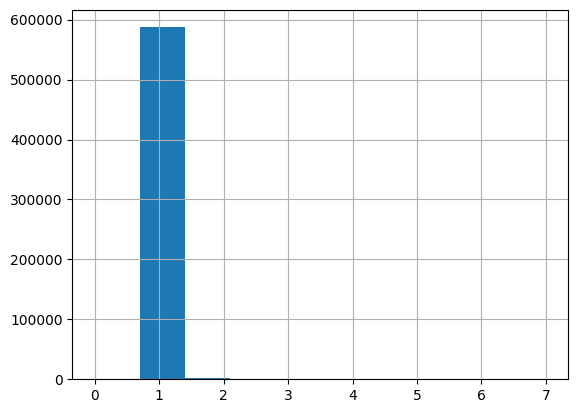

In [ ]:
train['V108'].hist()

<Axes: >

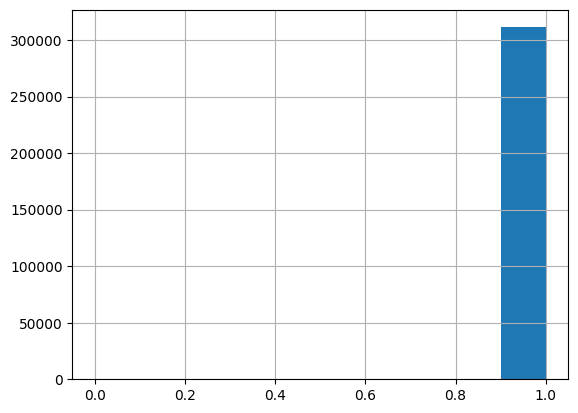

In [ ]:
train['V1'].hist()

<Axes: >

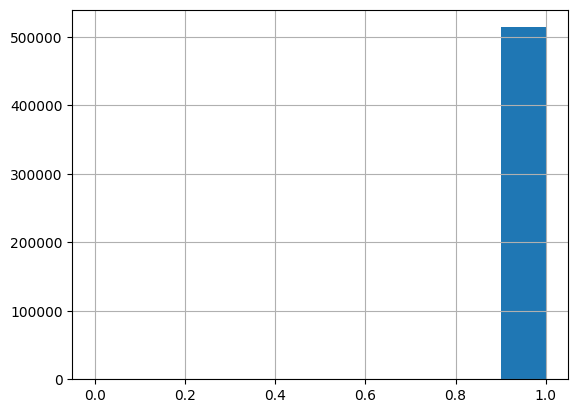

In [ ]:
train['V14'].hist()

<Axes: >

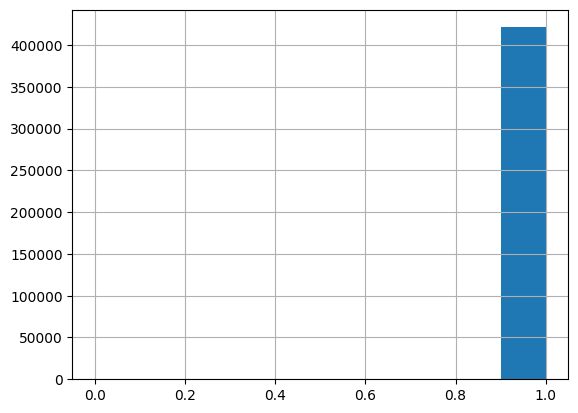

In [ ]:
train['V41'].hist()

<Axes: >

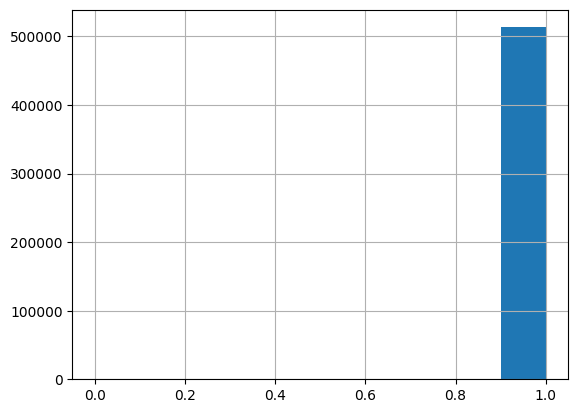

In [ ]:
train['V65'].hist()

<Axes: >

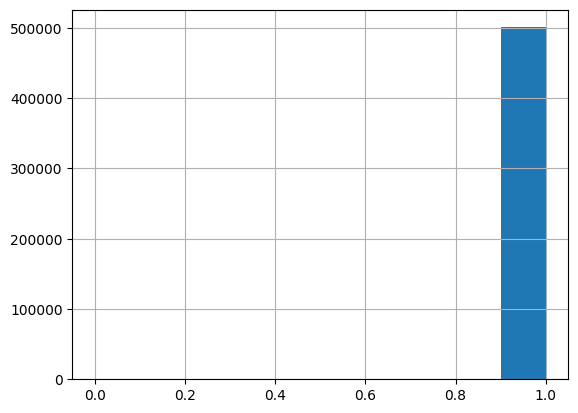

In [ ]:
train['V88'].hist()

<Axes: >

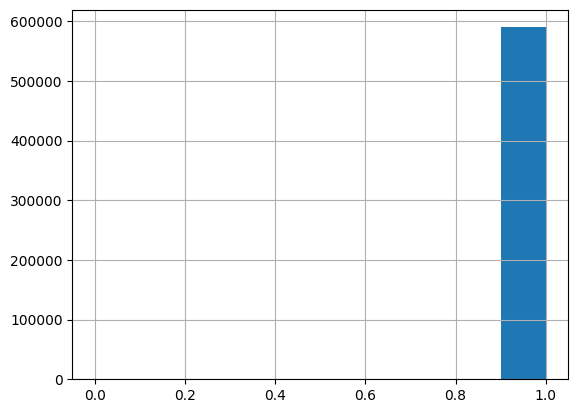

In [ ]:
train['V107'].hist()

<Axes: >

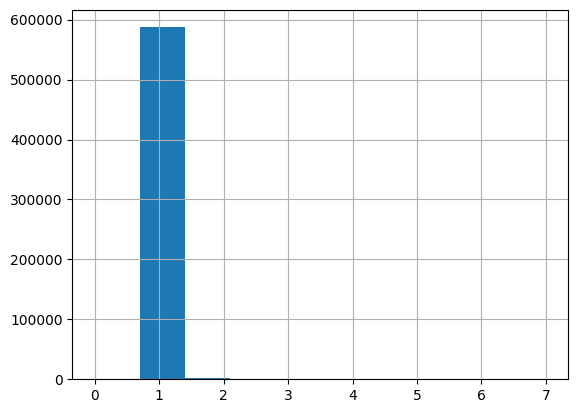

In [ ]:
train['V108'].hist()

<Axes: >

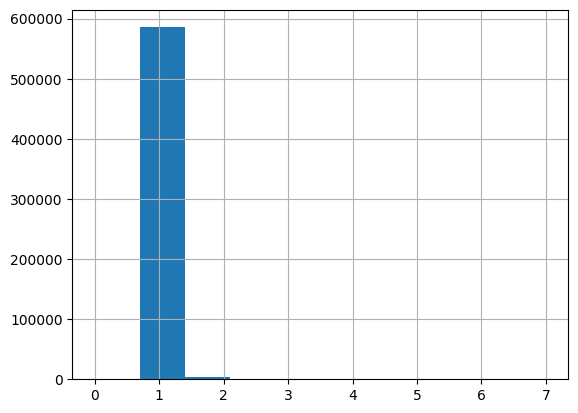

In [ ]:
train['V110'].hist()

<Axes: >

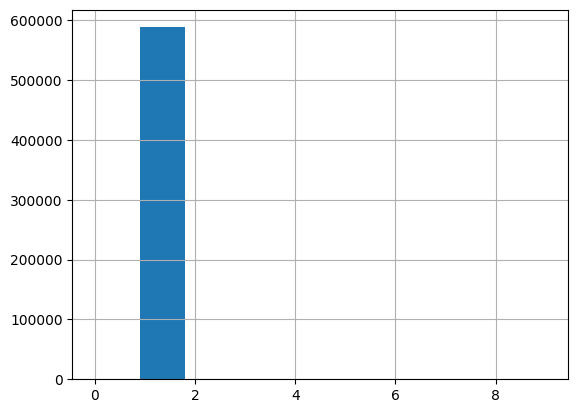

In [ ]:
train['V111'].hist()

<Axes: >

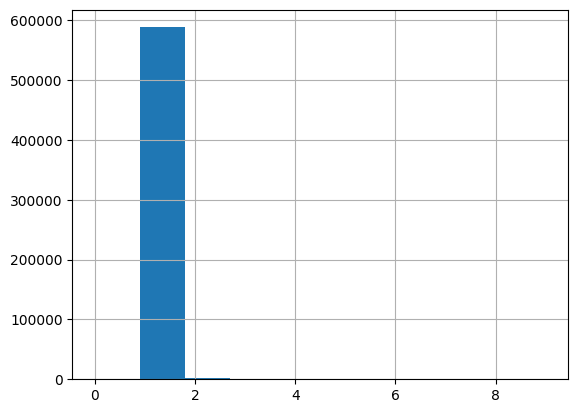

In [ ]:
train['V113'].hist()

<Axes: >

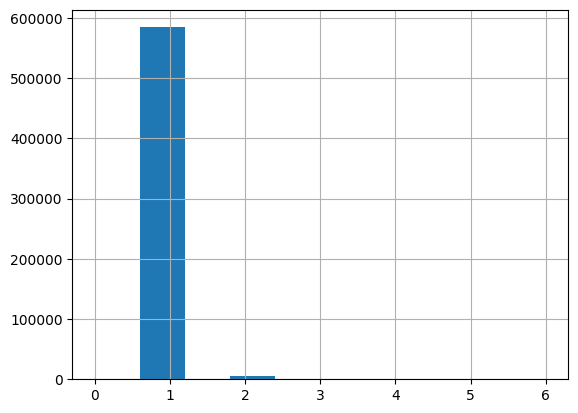

In [ ]:
train['V114'].hist()

<Axes: >

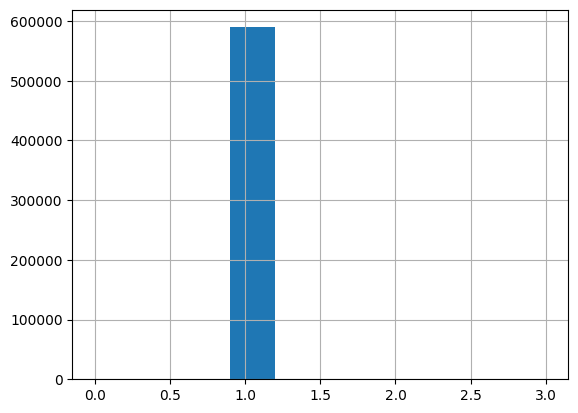

In [ ]:
train['V117'].hist()

<Axes: >

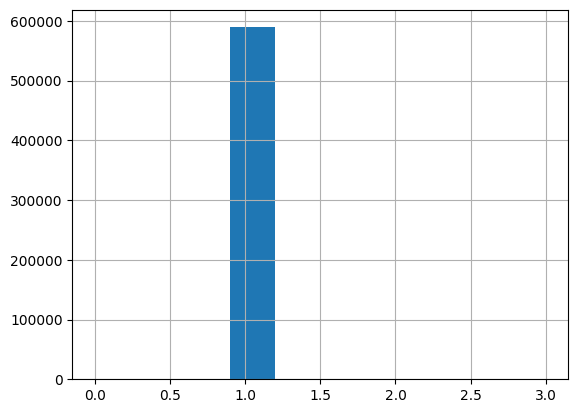

In [ ]:
train['V118'].hist()

<Axes: >

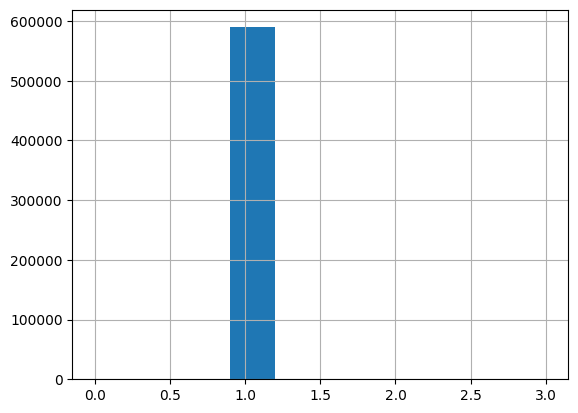

In [ ]:
train['V119'].hist()

<Axes: >

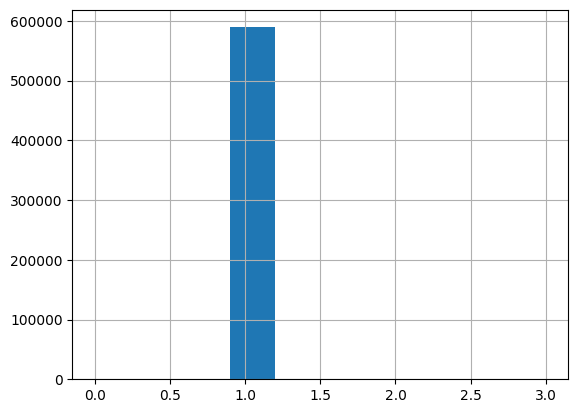

In [ ]:
train['V120'].hist()

<Axes: >

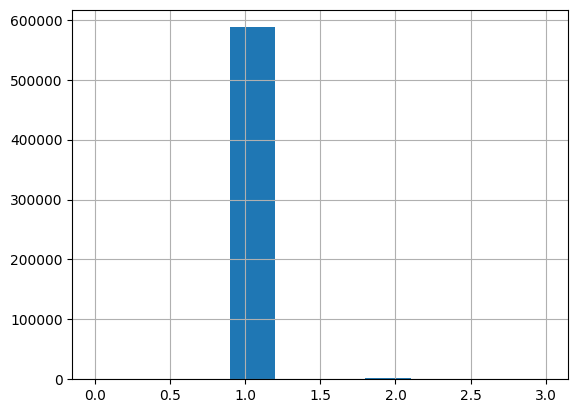

In [ ]:
train['V121'].hist()

<Axes: >

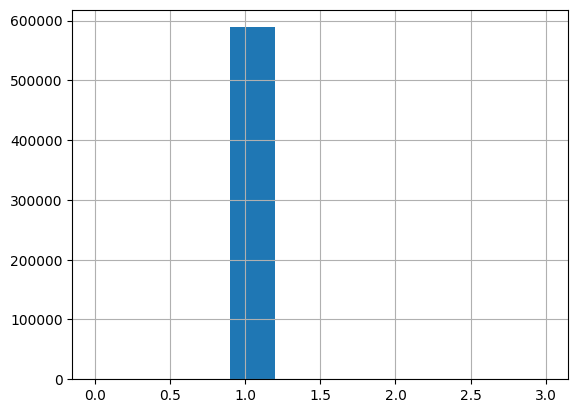

In [ ]:
train['V122'].hist()

<Axes: >

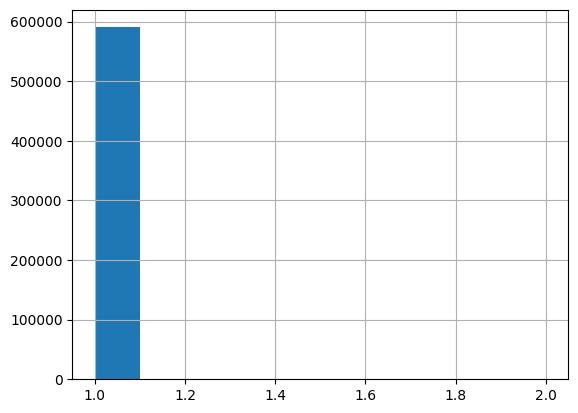

In [ ]:
train['V305'].hist()

<Axes: >

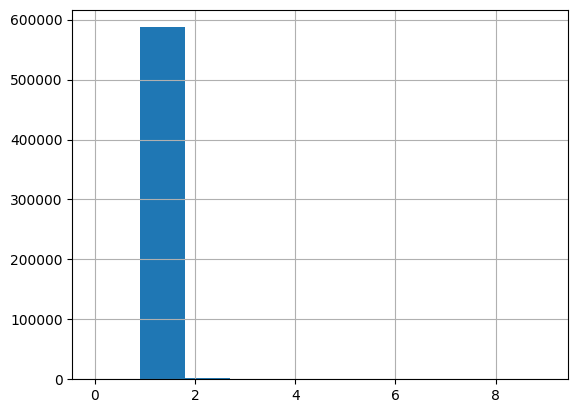

In [ ]:
train['V112'].hist()

**Seguimos eliminando las variables con CV menor que 0.11 una vez revisados sus histogramas**

In [41]:
train.drop(['V1', 'V14', 'V41', 'V65', 'V88', 'V107', 'V108', 'V110', 'V111','V112', 'V113', 'V114', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122',
       'V305'],axis=1,inplace=True)

**Debate**  
¿Está bien usar el coeficiente de variación? O prefieren usar rango intercuartil por ejemplo? O alguna otra medida que les diga cuán "poco variables" son los datos?... Y eliminarían todas las variables? Cuáles sí??

Grupo Marianita, Herdiz, Erick
consideramos que el coeficiente de variación para eliminar variables debería ser 0.11, puesto que estas variables el 75% de los datos es 1.

#### ++ Variables categoricas cuyo label mayor es cercano a 100%

Aquí deben desarrollar algo que permita encontrar cuál es el label con mayor frecuencia en cada variable categórica; luego ver el porcentaje de ese label. El resultado debería ser algo así:  

| Variable | Label | Porc |
| --- | --- | --- |
| Satisfacción | Bueno | 90 |
| País_Nacimi | Ecuad | 98 |

Lo que luego nos permitirá filtrar esas variable cuya primer categoría (en frecuencia) sea cercana a 100 (umbral por definir)


#### Muestro Columnas category con sus datos únicos y cuantos valores hay por cada categoria

In [ ]:
for col in train.columns:
    if train[col].dtypes == "category":
        print("-----")
        print(col)
        print("UNICOS: "+ str(train[col].nunique()))
        print(train[col].value_counts(dropna=False))
        print("-----")
  

Streaming output truncated to the last 5000 lines.
1376         2
3728         2
9293         2
17629        2
10884        2
8904         2
6579         2
12953        2
14016        2
17646        2
10874        2
17597        2
13765        2
17595        2
13766        2
3791         2
16832        2
17531        2
10926        2
4348         2
6781         2
17538        2
6783         2
3781         2
10914        2
13787        2
3775         2
10911        2
12938        2
13783        2
12940        2
3765         2
6588         2
3763         2
16830        2
17574        2
1758         2
13778        2
12955        2
10873        2
11316        2
1771         2
16754        2
9328         2
8885         2
1297         2
16753        2
7481         2
4414         2
6569         2
4418         2
6837         2
17735        2
8882         2
17738        2
1774         2
17743        2
3646         2
16749        2
14026        2
3645         2
10835        2
10833        2
1775

In [42]:
## Conocer el tipo de información que tenemos en las variables, Grupo Marianita, Herdiz, Erick
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 208 entries, TransactionID to V321
dtypes: category(20), float64(185), int32(2), int8(1)
memory usage: 856.7 MB


In [43]:
# Mostramos las caracgterísticas de las variables categóricas,  Grupo Marianita, Herdiz, Erick

train.describe(include=['category'])

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540,590540
unique,5,13553,501,115,5,120,5,333,75,60,61,3,3,3,4,3,3,3,3,3
top,W,7919,321.0,150.0,visa,226.0,debit,nan,87.0,gmail.com,nan,T,T,nan,nan,nan,F,nan,nan,nan
freq,439670,14932,48935,521287,384767,296546,439938,65706,520481,228355,453249,319415,285468,271100,281444,350482,227856,346265,346252,346252


In [44]:
# Hacemos un print de todas las variables al momento. Grupo Marianita, Herdiz, Erick
train.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V109,V115,V116,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,nan,150.0,discover,142.0,credit,315.0,87.0,19.00,nan,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,2.00,0.00,1.00,1.00,14.00,NaN,13.00,NaN,NaN,13.00,13.00,0.00,T,T,T,M2,F,T,nan,nan,nan,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,117.00,0.00,0.00,0.00,0.00
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,gmail.com,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,NaN,NaN,0.00,NaN,0.00,NaN,0.00,nan,nan,nan,M0,T,T,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.00,outlook.com,nan,1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,NaN,NaN,0.00,NaN,0.00,315.00,315.00,T,T,T,M0,F,F,F,F,F,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

#### ++Variables categóricas con errores

In [45]:
# Cambio de categoria nan por caregoría nan de nulos. Grupo Marianita, Herdiz, Erick
train.loc[train.R_emaildomain =='nan','R_emaildomain']=np.nan
train.loc[train.P_emaildomain =='nan','P_emaildomain']=np.nan
train.loc[train.addr1 =='nan','addr1']=np.nan
train.loc[train.addr2 =='nan','addr2']=np.nan
train.loc[train.card1 =='nan','card1']=np.nan
train.loc[train.card2 =='nan','card2']=np.nan
train.loc[train.card3 =='nan','card3']=np.nan
train.loc[train.card4 =='nan','card4']=np.nan
train.loc[train.card5 =='nan','card5']=np.nan
train.loc[train.card6 =='nan','card6']=np.nan
train.loc[train.M1 =='nan','M1']=np.nan
train.loc[train.M2 =='nan','M2']=np.nan
train.loc[train.M3 =='nan','M3']=np.nan
train.loc[train.M4 =='nan','M4']=np.nan
train.loc[train.M5 =='nan','M5']=np.nan
train.loc[train.M6 =='nan','M6']=np.nan
train.loc[train.M7 =='nan','M7']=np.nan
train.loc[train.M8 =='nan','M8']=np.nan
train.loc[train.M9 =='nan','M9']=np.nan

In [46]:
# verifico si existe después del cambio
train.loc[train.R_emaildomain =='nan']

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V109,V115,V116,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321


In [47]:
#Analizo Vacios nuevamente haciendo el cambio de las variables categóricas con errores por NaN nullos. Grupo Marianita, Herdiz, Erick
dtNull=train.isnull().sum()/len(train)*100
dtNull=dtNull.sort_values(ascending=False)
dtNull=pd.DataFrame({'PorcNulos':dtNull})
dtNull['columnas']=dtNull.index
dtNull.columns
dtNull.head(100) #aumentado


,PorcNulos,columnas
R_emaildomain,76.75,R_emaildomain
dist1,59.65,dist1
M5,59.35,M5
M7,58.64,M7
M8,58.63,M8
M9,58.63,M9
D5,52.47,D5
M4,47.66,M4
D2,47.55,D2
V5,47.29,V5


In [48]:
# Grupo Marianita, Herdiz, Erick
# Creemos que se debe eliminar la varibles categórica: R_emaildomain con  76.75% de NaN Grupo Marianita, Herdiz, Erick
train.drop(['R_emaildomain'],axis=1,inplace=True)


In [52]:
# MUESTRA EL PORCENTAJE (FRECUENCIA RELATIVA) POR CADA CATEGORIA GRUPO: Marianita, Herdiz, Erick
# una vez cambiado los nan por NaN (null)
for col in train.columns:
    if train[col].dtypes == "category":
        output = "-----\n"
        output += col + "\n"
        output += "UNICOS: " + str(train[col].nunique()) + "\n"
        output += str(train[col].value_counts(normalize=True, dropna=False))  + "\n"
        #output += "-----\n"
        print(output)

-----
ProductCD
UNICOS: 5
W   0.74
C   0.12
R   0.06
H   0.06
S   0.02
Name: ProductCD, dtype: float64

-----
card1
UNICOS: 13553
7919    0.03
9500    0.02
15885   0.02
17188   0.02
15066   0.01
12695   0.01
12544   0.01
6019    0.01
2803    0.01
7585    0.01
10616   0.01
12839   0.01
3154    0.01
2616    0.01
18132   0.01
9633    0.01
15497   0.01
16132   0.01
2884    0.01
16075   0.01
11207   0.01
10112   0.01
7508    0.01
10057   0.01
12501   0.01
7826    0.01
16659   0.01
12577   0.00
5812    0.00
7664    0.00
7861    0.00
6530    0.00
4461    0.00
8320    0.00
5033    0.00
7207    0.00
15063   0.00
10486   0.00
10023   0.00
7815    0.00
9112    0.00
16560   0.00
9026    0.00
16136   0.00
4806    0.00
13832   0.00
7676    0.00
12932   0.00
1444    0.00
4436    0.00
11839   0.00
17399   0.00
2772    0.00
2455    0.00
1675    0.00
14290   0.00
11157   0.00
3821    0.00
17055   0.00
1893    0.00
1974    0.00
17131   0.00
18018   0.00
1724    0.00
9803    0.00
8528    0.00
2392    0.00

In [ ]:
output = str(train.card1.value_counts(normalize=True, dropna=False))  + "\n"
print(output)

7919    0.03
9500    0.02
15885   0.02
17188   0.02
15066   0.01
12695   0.01
12544   0.01
6019    0.01
2803    0.01
7585    0.01
10616   0.01
12839   0.01
3154    0.01
2616    0.01
18132   0.01
9633    0.01
15497   0.01
16132   0.01
2884    0.01
16075   0.01
11207   0.01
10112   0.01
7508    0.01
10057   0.01
12501   0.01
7826    0.01
16659   0.01
12577   0.00
5812    0.00
7664    0.00
7861    0.00
6530    0.00
4461    0.00
8320    0.00
5033    0.00
7207    0.00
15063   0.00
10486   0.00
10023   0.00
7815    0.00
9112    0.00
16560   0.00
9026    0.00
16136   0.00
4806    0.00
13832   0.00
7676    0.00
12932   0.00
1444    0.00
4436    0.00
11839   0.00
17399   0.00
2772    0.00
2455    0.00
1675    0.00
14290   0.00
11157   0.00
3821    0.00
17055   0.00
1893    0.00
1974    0.00
17131   0.00
18018   0.00
1724    0.00
9803    0.00
8528    0.00
2392    0.00
15775   0.00
13249   0.00
17400   0.00
15651   0.00
14858   0.00
11201   0.00
3682    0.00
2256    0.00
1342    0.00
12686   0.00

#### ++ Variables categoricas que deben unirse las categorias

En R esto lo hace automaticamente tidymodels (https://recipes.tidymodels.org/reference/step_other.html), en Python no es así y esto afecta mucho en términos de RAM al modelamiento (por la cantidad de variables dummy que se crean)

**Grupo Marianita, Herdiz, Erick**

**1. Análsis de Diagrama de Barras de variables categóricas.**

**2. Rellenamos las variables con datos NAN con la moda para las categóricas y con la media para las numéricas.**

**3. Se exportan los datos a R, para realizar la unión de la categoría**

##### **1. Diagrama de Barras de Variables Categóricas**

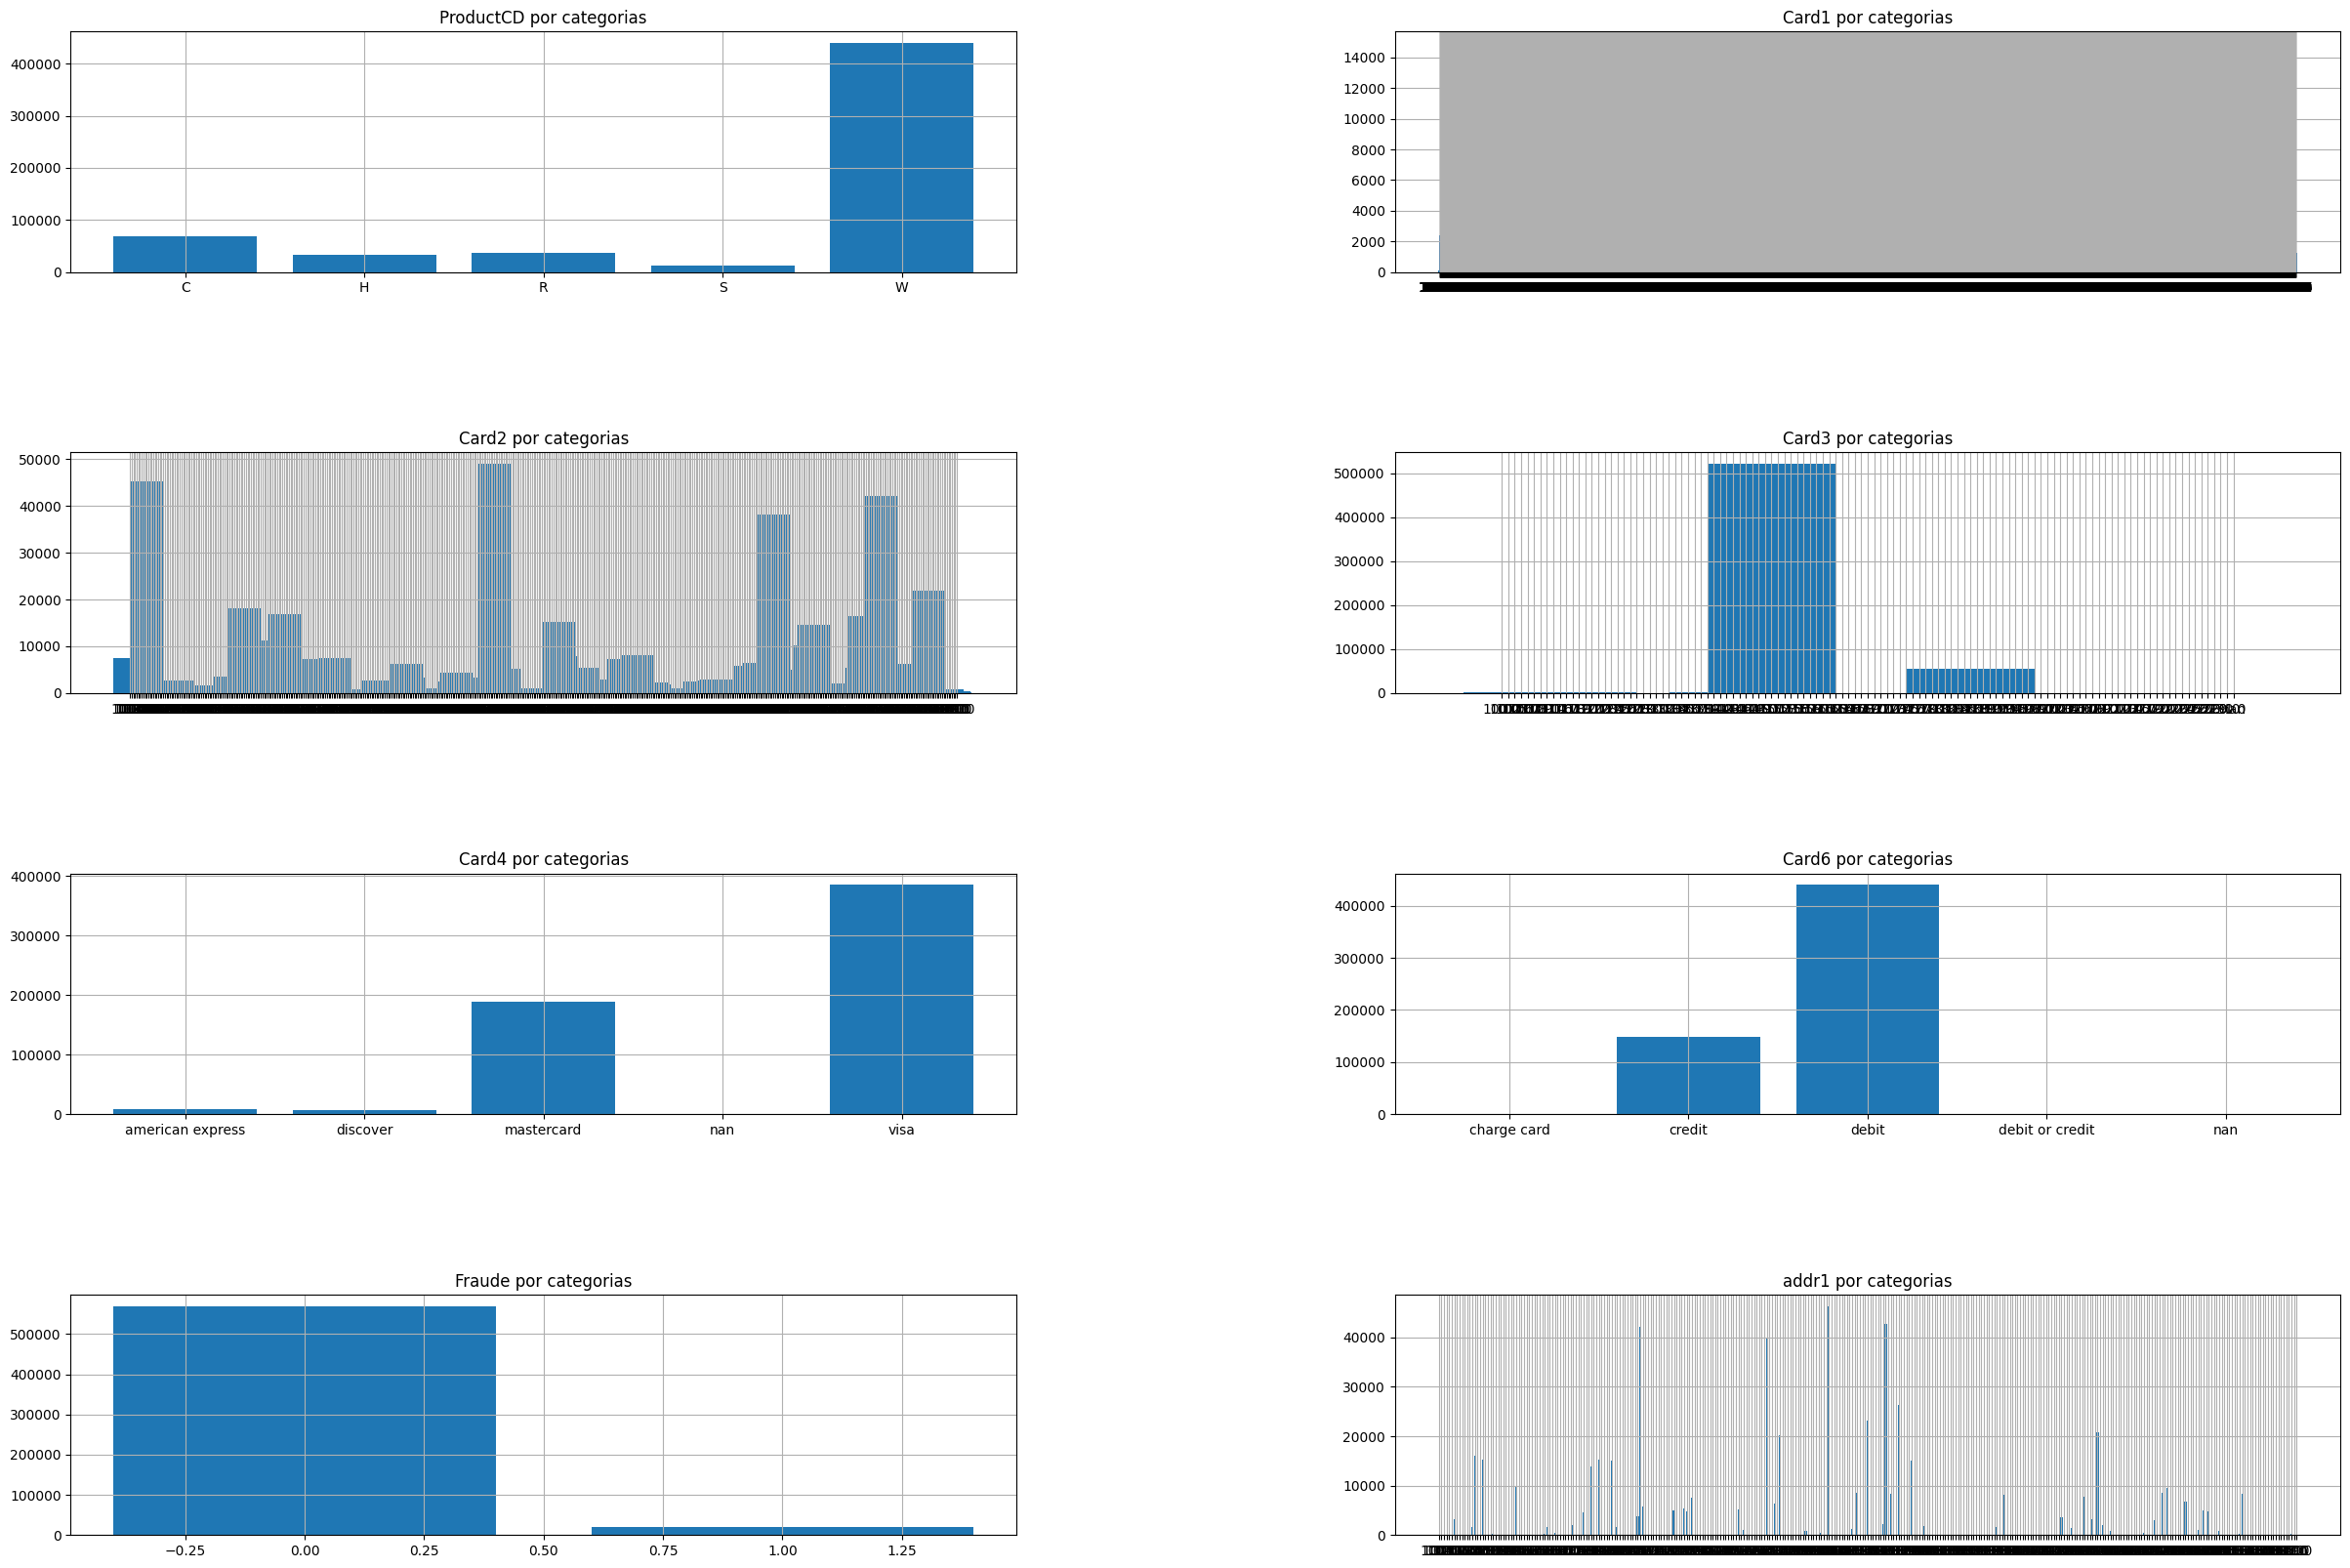

In [ ]:
# graficos de variables categóricas. Grupo Marianita, Herdiz, Erick

pl.figure(figsize=(30, 20))
pl.subplots_adjust(hspace=0.75, wspace=0.4)

#ProductCD
temp = train.ProductCD.value_counts(dropna=True,sort=True).rename_axis('ProductCD').reset_index(name='Conteo').sort_values(by='ProductCD')
pl.subplot(421)
#pl.bar(train.ProductCD.cat.categories, train.ProductCD.value_counts())
pl.bar(temp.ProductCD, temp.Conteo)
pl.title('ProductCD por categorias')
pl.grid(True)
#print(temp.head(10))


# CARD1
temp = train.card1.value_counts(dropna=True,sort=True).rename_axis('CARD1').reset_index(name='Conteo').sort_values(by='CARD1')
pl.subplot(422)
#pl.hist(train.card1.cat.categories)
#pl.axis([900,3000,0,7000])
pl.bar(temp.CARD1,temp.Conteo,width=60)
pl.title('Card1 por categorias')
pl.grid(True)
#print(temp.head(10))

#CARD2
temp = train.card2.value_counts(dropna=True,sort=True).rename_axis('CARD2').reset_index(name='Conteo').sort_values(by='CARD2')
pl.subplot(423)
#pl.hist(train.card2.cat.categories)
#pl.axis([90,400,0,20000])
pl.bar(temp.CARD2, temp.Conteo,width=20)
pl.title('Card2 por categorias')
pl.grid(True)
#print(temp.head(10))

#CARD3
temp = train.card3.value_counts(dropna=True,sort=True).rename_axis('CARD3').reset_index(name='Conteo').sort_values(by='CARD3')
pl.subplot(424)
#pl.hist(train.card2.cat.categories)
#pl.axis([90,400,0,20000])
pl.bar(temp.CARD3, temp.Conteo,width=20)
pl.title('Card3 por categorias')
pl.grid(True)


#CARD4
temp = train.card4.value_counts(dropna=True,sort=True).rename_axis('CARD4').reset_index(name='Conteo').sort_values(by='CARD4')
pl.subplot(425)
#pl.bar(train.card4.cat.categories, train.card4.value_counts())
pl.bar(temp.CARD4, temp.Conteo)
pl.title('Card4 por categorias')
pl.grid(True)
#print(temp.head(10))

#CARD6
temp = train.card6.value_counts(dropna=True,sort=True).rename_axis('CARD6').reset_index(name='Conteo').sort_values(by='CARD6')
pl.subplot(426)
pl.bar(temp.CARD6, temp.Conteo)
#pl.bar(train.card6.cat.categories, train.card6.value_counts())
pl.title('Card6 por categorias')
pl.grid(True)
#print(temp.head(10))

#ISFRAUD
temp = train.isFraud.value_counts(dropna=True,sort=True).rename_axis('isFraud').reset_index(name='Conteo').sort_values(by='isFraud')
pl.subplot(427)
pl.bar([0,1], temp.Conteo)
#pl.bar(train.isFraud.cat.categories, train.isFraud.value_counts())
pl.title('Fraude por categorias')
pl.grid(True)
#print(temp.head(10))

#addr1
temp = train.addr1.value_counts(dropna=True,sort=True).rename_axis('addr1').reset_index(name='Conteo').sort_values(by='addr1')
pl.subplot(428)
#pl.bar(train.ProductCD.cat.categories, train.ProductCD.value_counts())
pl.bar(temp.addr1, temp.Conteo)
pl.title('addr1 por categorias')
pl.grid(True)
#print(temp.head(10))


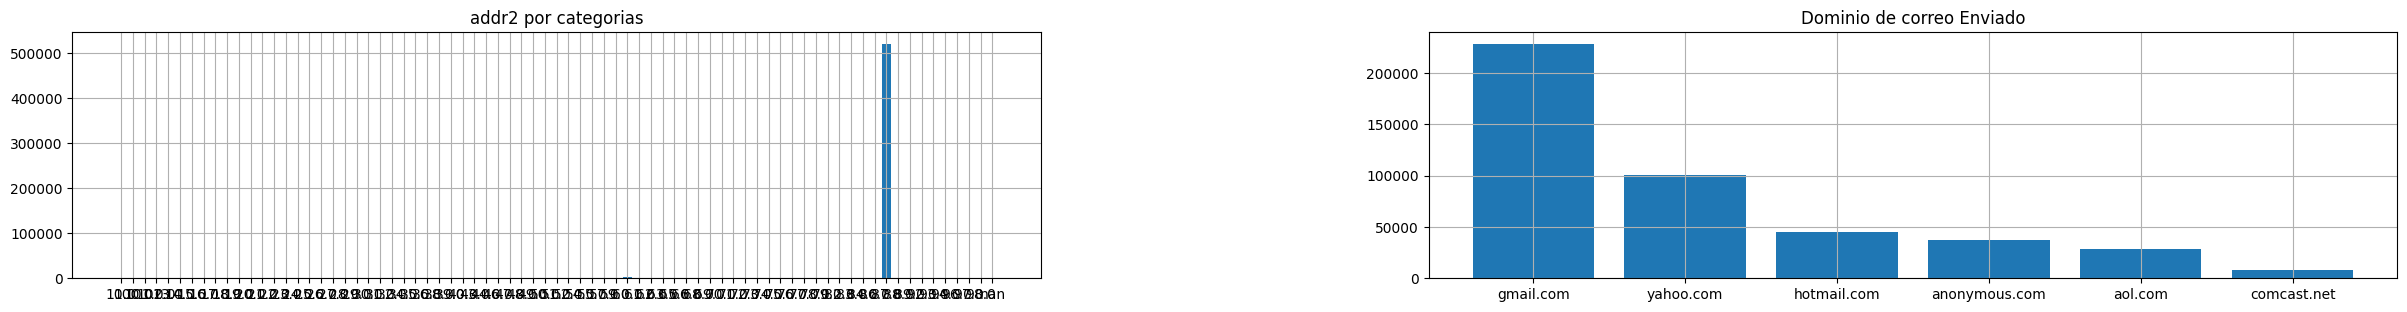

In [ ]:
pl.figure(figsize=(30, 20))
pl.subplots_adjust(hspace=0.75, wspace=0.4)

#addr2
temp = train.addr2.value_counts(dropna=True,sort=True).rename_axis('addr2').reset_index(name='Conteo').sort_values(by='addr2')
pl.subplot(421)
#pl.bar(train.ProductCD.cat.categories, train.ProductCD.value_counts())
pl.bar(temp.addr2, temp.Conteo)
pl.title('addr2 por categorias')
pl.grid(True)
#print(temp.head(10))

#P_emaildomain
temp = train.P_emaildomain.value_counts(dropna=True,sort=True).rename_axis('P_emaildomain').reset_index(name='Conteo').sort_values(by='Conteo', ascending=False)
temp=temp.head(6)
pl.subplot(422)
pl.bar(temp.P_emaildomain, temp.Conteo)
pl.title('Dominio de correo Enviado')
pl.grid(True)
#print(temp.head(10))


++**Grupo Marianita, Herdiz, Erick**

M9 => Sugerimos hacer el relleno de los NaN de 59% con la moda

M8 => Sugerimos hacer el relleno de los NaN de 59% con la moda

M7 => Sugerimos hacer el relleno de los NaN de 59% con la moda

M6 => Sugerimos hacer el relleno de los NaN de 29% con la moda

M5 => Sugerimos hacer el relleno de los NaN de 59% con la moda

M4 => Sugerimos hacer el relleno de los NaN de 48% con la moda

M3 => Sugerimos hacer el relleno de los NaN de 46% con la moda

M2 => Sugerimos hacer el relleno de los NaN de 46% con la moda

M1 => Sugerimos hacer el relleno de los NaN de 46% con la moda


P_emaildomain => Sugerimos hacer el relleno de los NaN de 16% con la moda
		=> Suguerimos agrupar las categorías con frecuencias relativas menor a 0.01

addr2 => Sugerimos hacer el relleno de los NaN que son el 11% con la moda
	=> agrupar categorías con frecuencia relativa menor a 0.01

addr1 => Sugerimos hacer el relleno de los NaN que son el 11% con la moda
	=> agrupar categorías con frecuencia relativa menor a 0.03

card6 => Sugerimos hacer el relleno de los NaN que son el 0.003% con la moda

card5 => Sugerimos hacer el relleno de los NaN que son el 0.01% con la moda
	=> agrupar categorías con frecuencia relativa menor a 0.01

card4 => Sugerimos hacer el relleno de los NaN que son el 0.01% con la moda

card3 => Sugerimos hacer el relleno de los NaN que son el 0.0001% con la moda
	=> agrupar categorías con frecuencia relativa menor a 0.10

card2 => Sugerimos hacer el relleno de los NaN que son el 0.02% con la moda
	=> agrupar categorías con frecuencia relativa menor a 0.02
card1 => Sugerimos hacer el relleno de los NaN que son el 0.001% con la moda
	=> agrupar categorías con frecuencia relativa menor a 0.02


**2. Rellenamos las variables de datos NAN con la moda para las categóricas y con la media para las numéricas: Grupo Marianita, Herdiz, Erick**

In [51]:
# Nuevos arreglo de categoricas Grupo Marianita, Herdiz, Erick

cols_cat_train= ['ProductCD',	'card1',	'card2',	'card3','card4',	'card5',	'card6',	'addr1',	'addr2',	
                 'P_emaildomain',	'M1',	'M2',	'M3',	'M4',	'M5',	'M6',	'M7',	'M8',	'M9']

In [50]:
# Imputing in iteration Grupo Marianita, Herdiz, Erick
for col in train.columns:
    if train[col].isnull().sum() > 0:
        if col in cols_cat_train:
            train[col].fillna(train[col].mode()[0],inplace=True)
            print("column {} has been imputed with mode".format(col))
        else:
            
            train[col].fillna(train[col].median(),inplace=True)
            print("column {} has been imputed with mean".format(col))          
         

column card2 has been imputed with mode
column card3 has been imputed with mode
column card4 has been imputed with mode
column card5 has been imputed with mode
column card6 has been imputed with mode
column addr1 has been imputed with mode
column addr2 has been imputed with mode
column dist1 has been imputed with mean
column P_emaildomain has been imputed with mode
column D1 has been imputed with mean
column D2 has been imputed with mean
column D3 has been imputed with mean
column D4 has been imputed with mean
column D5 has been imputed with mean
column D10 has been imputed with mean
column D11 has been imputed with mean
column D15 has been imputed with mean
column M1 has been imputed with mode
column M2 has been imputed with mode
column M3 has been imputed with mode
column M4 has been imputed with mode
column M5 has been imputed with mode
column M6 has been imputed with mode
column M7 has been imputed with mode
column M8 has been imputed with mode
column M9 has been imputed with mode


**3. Se exportan los datos a R, para realizar la unión de la categoría**

In [71]:
train[["P_emaildomain","addr2",'addr1',"card5","card3","card2","card1"]].to_csv(dir_base_catego+'/categoria.csv')

In [67]:
str(dir_base_catego)

'/content/drive/MyDrive/Python_Colab/Datos/'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def step_other(data, column, threshold, other_label='Other'):
    # Obtener los valores y sus frecuencias
    counts = data[column].value_counts()
    frequent_values = counts[counts >= threshold].index

    # Crear un nuevo DataFrame con los valores frecuentes
    filtered_data = data[data[column].isin(frequent_values)]

    # Convertir los valores poco frecuentes en "Other"
    filtered_data[column].where(filtered_data[column].isin(frequent_values), other_label, inplace=True)

    # Combinar el DataFrame filtrado con los valores poco frecuentes
    data = pd.concat([filtered_data, data[~data[column].isin(frequent_values)]])

    return data

# Ejemplo de uso

data_converted = step_other(train, column='P_emaildomain', threshold=2)

print(data_converted)


#### ++ Análisis simple de la variable Y

- Categórica? Cuántos niveles?
- Numérica? Cómo se distribuye? tiene Outliers?

In [ ]:
#  Algunos gráficos representativos. - HL
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15, 7))
plt.style.use('seaborn-white')
#Compañias de Tarjetas
plt.subplot(221)
plots=sns.countplot(x="card4", data=train, palette="pastel",
              order=train.card4.value_counts().index)


for bar in plots.patches: 
    # annotate permite ubicar como etiqueta el tamaño de la barra
    plt.annotate(int(bar.get_height()),  
    #se indica la ubicación de la etiqueta por cada barra                 
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', 
    size=14, xytext=(0, 8), 
    textcoords='offset points')

fig = plt.gcf()
fig.set_size_inches(10,10)

#Tipo de tarjeta
plt.subplot(222)
plots=sns.countplot(x="card6", data=train, palette="pastel",
              order=train.card6.value_counts().index)



for bar in plots.patches: 
    # annotate permite ubicar como etiqueta el tamaño de la barra
    plt.annotate(int(bar.get_height()),  
    #se indica la ubicación de la etiqueta por cada barra                 
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', 
    size=14, xytext=(0, 8), 
    textcoords='offset points')

fig = plt.gcf()
fig.set_size_inches(10,10)

DeviceType
plt.subplot(223)
plots=ax=sns.countplot(x="DeviceType", data=train, palette="pastel",
              order=train.DeviceType.value_counts().index)

for bar in plots.patches: 
    # annotate permite ubicar como etiqueta el tamaño de la barra
    plt.annotate(int(bar.get_height()),  
    #se indica la ubicación de la etiqueta por cada barra                 
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', 
    size=14, xytext=(0, 8), 
    textcoords='offset points')

fig = plt.gcf()
fig.set_size_inches(10,10)

 DeviceInfo
plt.subplot(224)
plots=ax=sns.countplot(x="DeviceInfo", data=train, palette="pastel",
              order=train.DeviceInfo.value_counts().iloc[:10].index)


for bar in plots.patches: 
    # annotate permite ubicar como etiqueta el tamaño de la barra
    plt.annotate(int(bar.get_height()),  
    #se indica la ubicación de la etiqueta por cada barra                 
    (bar.get_x() + bar.get_width() / 2, bar.get_height()), ha='center', va='center', 
    size=10, xytext=(0, 8), 
    textcoords='offset points')

fig = plt.gcf()
fig.set_size_inches(10,10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
plt.tight_layout()
plt.show()


IndentationError: ignored

#### Conclusiones

Aquí deben poner las conclusiones de todo el proceso de EDA:  
- ¿Qué variables se eliminan y porqué?
- ¿Qué variables se van a transformar, por ejemplo creando una nueva que sea binaria e indique que hubo missing_value
- ¿Existe alguna variables que amerite realizarle una transformación (cuadrática, logaritmica)?

#### GRUPO Marianita, Herdiz, Erick

Consideramos que se deben eliminar las varibles con más del 70% con NA (numéricas y categóricas), arriba está el código.

Consideramos que el coeficiente de variación para eliminar variables debería ser 0.11, puesto que estas variables el 75% de los datos es 1 (cuartil 3).

--------------
--------------
--------------

### EDA Multivariado

Para encontrar 
- Relaciones entre variables como variables que pueden producir tener multicolinearidad o concurvidad, etc.
- Cómo se comportan las variables vs la variable Y 
- Existen valores aberrantes cuando se comparan variables (o pares de variables) vs nuestra Y

#### ++ Variables con alta correlación